In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


columns = inspector.get_columns('measurement')
print(columns)

columns = inspector.get_columns('measurement') print(columns)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results



        

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores
data2yrsago = engine.execute('SELECT * FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27"').fetchall()
#print(data2yrsago)
# Save the query results as a Pandas DataFrame and set the index to the date column
date2_df = pd.DataFrame.from_dict(data2yrsago)
#date2_df.head(10)
date2_df.columns = ['a', 'station','date','precipitation','tobs']
date2_df.head()
bydate_df = date2_df.set_index('date')
bydate_df = bydate_df.drop(columns=['a'])
bydate_df = bydate_df.groupby('date')
# Sort the dataframe by date
bydate_df.head(10)



,station,precipitation,tobs
date,,,
2016-10-27,USC00519397,0.00,77.0
2016-10-28,USC00519397,0.00,78.0
2016-10-29,USC00519397,0.00,77.0
2016-10-30,USC00519397,0.24,76.0
2016-10-31,USC00519397,0.03,77.0
2016-11-01,USC00519397,0.00,77.0
2016-11-02,USC00519397,0.00,77.0
2016-11-03,USC00519397,0.00,77.0
2016-11-04,USC00519397,0.00,77.0


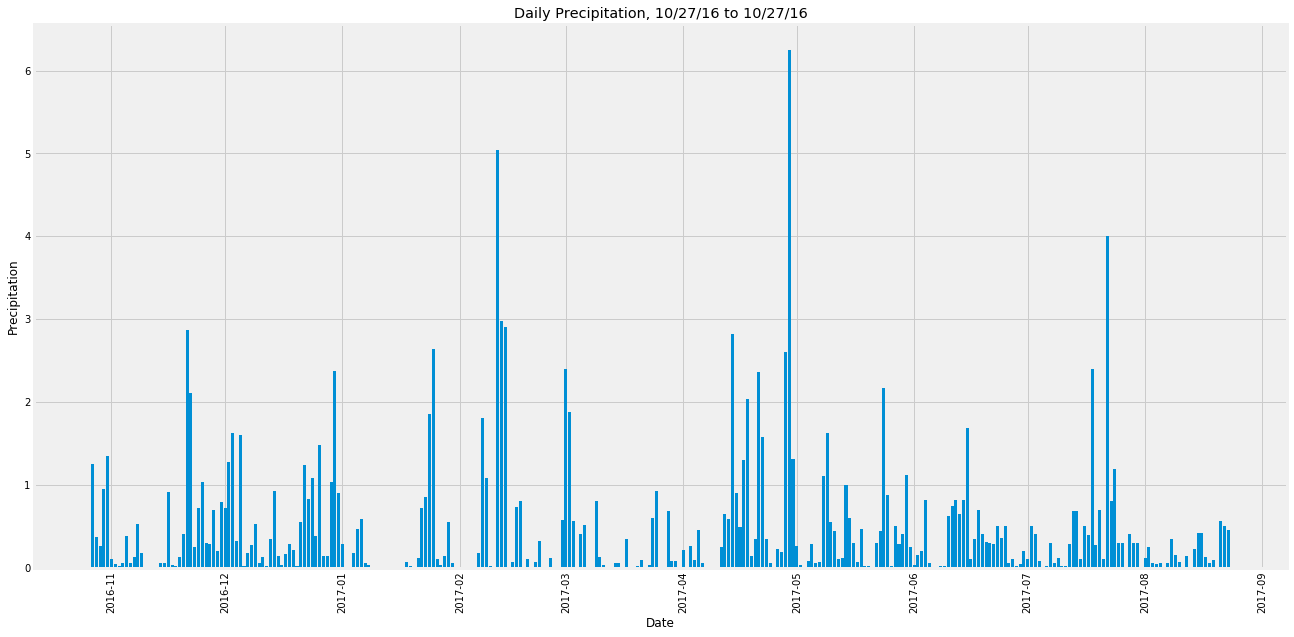

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df = date2_df.reset_index()
new_df.head()
x1 = new_df['date'].tolist()
x2 = pd.to_datetime(x1,infer_datetime_format=True)
y1 = new_df['precipitation'].tolist()

plt.figure(figsize=(20,10))

plt.bar(x2, y1)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Daily Precipitation, 10/27/16 to 10/27/16')
plt.xticks(rotation=90)
plt.show()

# Rotate the xticks for the dates

![precipitation](Images/precipitation.png)

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
new_df.describe()

,index,a,precipitation,tobs
count,1816.000000,1816.000000,1646.000000,1816.000000
mean,907.500000,10186.635463,0.165595,73.886564
std,524.378362,5612.645974,0.431122,4.684694
min,0.000000,2429.000000,0.000000,58.000000
25%,453.750000,5313.750000,0.000000,71.000000
50%,907.500000,8945.500000,0.010000,74.000000
75%,1361.250000,14790.250000,0.120000,77.000000
max,1815.000000,19550.000000,6.250000,87.000000


In [44]:
# How many stations are available in this dataset?
new_df.groupby('station').count()
print(len('station'))

7


In [83]:
# What are the most active stations?
#new_df.sort_values(['station','precipitation'], axis=0, ascending=False)
new_df.drop_duplicates(subset='station')


,index,a,station,date,precipitation,tobs
0,0,2429,USC00519397,2016-10-27,0.00,77.0
296,296,5156,USC00513117,2016-10-27,0.11,75.0
574,574,7384,USC00514830,2016-10-27,0.20,78.0
826,826,8864,USC00517948,2016-10-27,NaN,77.0
970,970,11914,USC00519523,2016-10-27,0.08,78.0
1244,1244,14673,USC00519281,2016-10-27,0.22,76.0
1531,1531,19266,USC00516128,2016-10-27,1.25,71.0


In [84]:
# List the stations and the counts in descending order.
new_df.groupby(['station']).agg(['count'])

,index,a,date,precipitation,tobs
,count,count,count,count,count
station,,,,,
USC00513117,278,278,278,278,278
USC00514830,252,252,252,219,252
USC00516128,285,285,285,265,285
USC00517948,144,144,144,48,144
USC00519281,287,287,287,287,287
USC00519397,296,296,296,296,296
USC00519523,274,274,274,253,274


In [80]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


,index,a,station,date,precipitation,tobs
0,0,2429,USC00519397,2016-10-27,0.00,77.0
1,1,2430,USC00519397,2016-10-28,0.00,78.0
2,2,2431,USC00519397,2016-10-29,0.00,77.0
3,3,2432,USC00519397,2016-10-30,0.24,76.0
4,4,2433,USC00519397,2016-10-31,0.03,77.0
5,5,2434,USC00519397,2016-11-01,0.00,77.0
6,6,2435,USC00519397,2016-11-02,0.00,77.0
7,7,2436,USC00519397,2016-11-03,0.00,77.0
8,8,2437,USC00519397,2016-11-04,0.00,77.0
9,9,2438,USC00519397,2016-11-05,0.00,76.0


In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [19]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [20]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [21]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [22]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [24]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [25]:
# Plot the daily normals as an area plot with `stacked=False`
